In [1]:
import glob
import pandas as pd
import pandas as pd
import matplotlib as plt
%matplotlib inline
import japanize_matplotlib

In [3]:
file = glob.glob('edit_file/*.csv')
file

['edit_file\\AUDUSD_1645710921901.csv', 'edit_file\\AUDUSD_1645887639833.csv']

In [28]:
df_concat = pd.DataFrame()
for i in file:
    df = pd.read_csv(i,encoding='cp932')
    df_concat = pd.concat([df_concat,df])
df_concat.head()

,日付,始値,高値,安値,終値
0,2022年02月18日 19:00,0.72135,0.72150,0.72015,0.72022
1,2022年02月18日 20:00,0.72022,0.72051,0.71967,0.72038
2,2022年02月18日 21:00,0.72038,0.72174,0.72019,0.72129
3,2022年02月18日 22:00,0.72128,0.72143,0.72001,0.72052
4,2022年02月18日 23:00,0.72052,0.72080,0.71910,0.72028


In [29]:
df_concat.shape

(200, 5)

In [45]:
df_concat.drop_duplicates(inplace=True)
df_concat.sort_values('日付',inplace=True)
df_concat.reset_index(inplace=True)
df_concat.shape

(133, 6)

In [46]:
df_concat.tail()

,index,日付,始値,高値,安値,終値
128,95,2022年02月26日 02:00,0.72152,0.72179,0.72053,0.72086
129,96,2022年02月26日 03:00,0.72087,0.72214,0.72086,0.72154
130,97,2022年02月26日 04:00,0.72154,0.72313,0.72129,0.72311
131,98,2022年02月26日 05:00,0.72311,0.72333,0.72266,0.72296
132,99,2022年02月26日 06:00,0.72296,0.72349,0.72155,0.72175


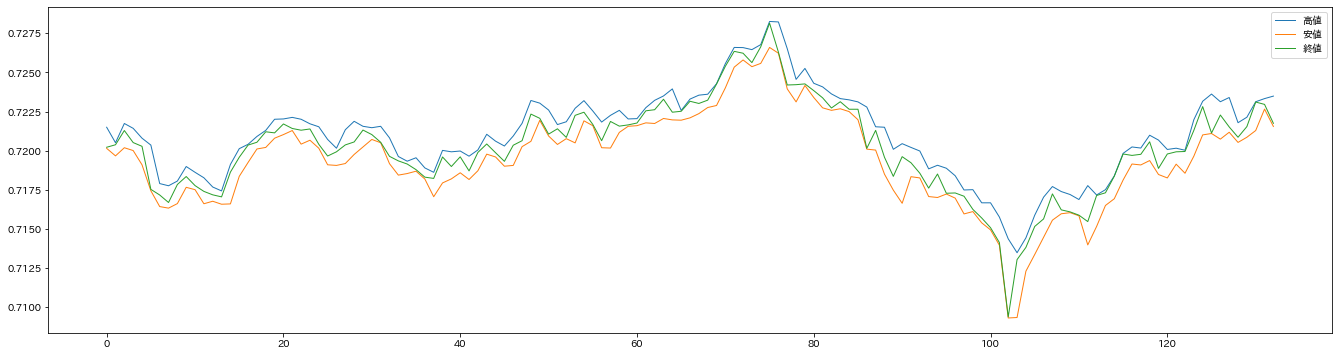

In [48]:
plt.pyplot.figure(figsize=(23,6))
plt.pyplot.plot(df_concat['高値'], linewidth=1, label="高値")
plt.pyplot.plot(df_concat['安値'], linewidth=1, label="安値")
plt.pyplot.plot(df_concat['終値'], linewidth=1, label="終値")
plt.pyplot.legend()
plt.pyplot.show()